In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score

import warnings
import platform
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as spst
import pandas as pd 


from matplotlib import font_manager, rc 
warnings.filterwarnings('ignore')

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

In [6]:
df = pd.read_csv("Total_Data_5.csv")
df.head(2)

,content_cnt,content_line,quote_cnt,img_cnt,솔직 빈도 수,비교 빈도 수,ㅋ 빈도 수,ㅋㅋ 빈도 수,ㅋㅋㅋ 빈도 수,ㅋㅋㅋㅋ 빈도 수,...,솔직키워드2,이미지광고키워드1,이미지광고키워드2,이미지광고키워드3,이미지쿠팡키워드1,이미지순수키워드1,이미지없음,이미지글없음,광고 분류1,광고 분류2
0,1455,14,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2680,7,0,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2


## 학습용, 테스트 데이터 나누기

In [37]:
XX_train, X_test, yy_train, y_test = train_test_split(df.drop(["광고 분류1","광고 분류2"],axis=1),df["광고 분류2"], test_size=0.3, random_state=42, stratify= df["광고 분류2"] )

## 학습용, 검증용 데이터 나누기

In [48]:
x_train, x_val, y_train, y_val= train_test_split(XX_train, yy_train, test_size=0.2, random_state=42, stratify= yy_train)

In [50]:
y_train1 = y_train.copy()

In [51]:
y_train1.loc[y_train1 >=1] = 1

In [76]:
y_train1.value_counts()

0    1082
1     301
Name: 광고 분류2, dtype: int64

## 모델링

In [16]:
result = {}

In [55]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lg_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(max_depth =3,random_state=42)

In [56]:
dt_score = cross_val_score(dt_model,x_train,y_train,scoring='accuracy',cv=5)
result["DT"] = [dt_score.mean()]

dt_score = cross_val_score(rf_model,x_train,y_train,scoring='accuracy',cv=5)
result["Rf"] = [dt_score.mean()
]
dt_score = cross_val_score(lg_model,x_train,y_train,scoring='accuracy',cv=5)
result["lg"] =[ dt_score.mean()]

dt_score = cross_val_score(xgb_model,x_train.values,y_train,scoring='accuracy',cv=5)
result["XGB"] =[ dt_score.mean()]

[23:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

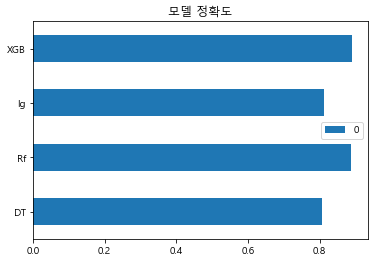

In [57]:
pd.DataFrame(result).T.plot(kind="barh",title="모델 정확도");

In [59]:
result

{'DT': [0.8062052006487731],
 'Rf': [0.8879192172866635],
 'lg': [0.8112881284989275],
 'XGB': [0.8900800502275938]}

In [62]:
xgb_model = XGBClassifier(max_depth =3,random_state=42)

In [63]:
xgb_model.fit(x_train.values,y_train)

[23:53:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [64]:
y_pred = xgb_model.predict(x_val.values)

In [65]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
accuracy_score(y_val,y_pred)

0.8786127167630058

In [66]:
y_pred = xgb_model.predict(X_test.values)

In [68]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.8852901484480432

In [72]:
confusion_matrix(y_test,y_pred)

array([[561,   1,  18],
       [ 27,  23,   3],
       [ 32,   4,  72]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       580
           1       0.82      0.43      0.57        53
           2       0.77      0.67      0.72       108

    accuracy                           0.89       741
   macro avg       0.83      0.69      0.74       741
weighted avg       0.88      0.89      0.88       741



## 이진 분류
광고냐 vs 아니냐

In [89]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lg_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(max_depth =4,random_state=42)

In [90]:
dt_score = cross_val_score(dt_model,x_train,y_train1,scoring='accuracy',cv=5)
result["DT"] = [dt_score.mean()]

dt_score = cross_val_score(rf_model,x_train,y_train1,scoring='accuracy',cv=5)
result["Rf"] = [dt_score.mean()
]
dt_score = cross_val_score(lg_model,x_train,y_train1,scoring='accuracy',cv=5)
result["lg"] =[ dt_score.mean()]

dt_score = cross_val_score(xgb_model,x_train.values,y_train1.values,scoring='accuracy',cv=5)
result["XGB"] =[ dt_score.mean()]

[23:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [91]:
result

{'DT': [0.8235546486684455],
 'Rf': [0.8965834772144614],
 'lg': [0.8539318788259301],
 'XGB': [0.8835661591586877]}

In [92]:
y_train1.value_counts() / y_train1.value_counts().sum() 

0    0.782357
1    0.217643
Name: 광고 분류2, dtype: float64

In [107]:
xgb_model.fit(x_train.values,y_train1)

[00:00:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_pred = xgb_model.predict(x_val)

In [110]:
y_val.loc[y_val>=1]= 1 

In [112]:
accuracy_score(y_val,y_pred)

0.869942196531792

In [114]:
y_test.loc[y_test>=1]= 1 

In [115]:
y_pred = xgb_model.predict(X_test.values)

In [116]:
accuracy_score(y_test,y_pred)

0.8906882591093117

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       580
           1       0.82      0.63      0.72       161

    accuracy                           0.89       741
   macro avg       0.86      0.80      0.82       741
weighted avg       0.89      0.89      0.89       741



## 원인 파악 
Shap value 활용

In [119]:
X_test.shape

(741, 49)

In [125]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_train.values)

In [124]:
columns1 = list(x_train)

In [127]:
y_pred = xgb_model.predict(x_train.values)

In [131]:
idx = 2
print(f"실제 y 값 : {y_train.values[idx]}  예측값 : {y_pred[idx]}  (1 : 광고, 0 : 순수)")
shap.force_plot(explainer.expected_value,
               shap_values[idx, :],
               x_train.iloc[idx,:], link='logit') # link='logit'

실제 y 값 : 0  예측값 : 0  (1 : 광고, 0 : 순수)


In [130]:
idx = 356
print(f"실제 y 값 : {y_train.values[idx]}  예측값 : {y_pred[idx]} (1 : 광고, 0 : 순수)")
shap.force_plot(explainer.expected_value,
               shap_values[idx, :],
                x_train.iloc[idx,:], link='logit') # link='logit'

실제 y 값 : 0  예측값 : 0 (1 : 광고, 0 : 순수)


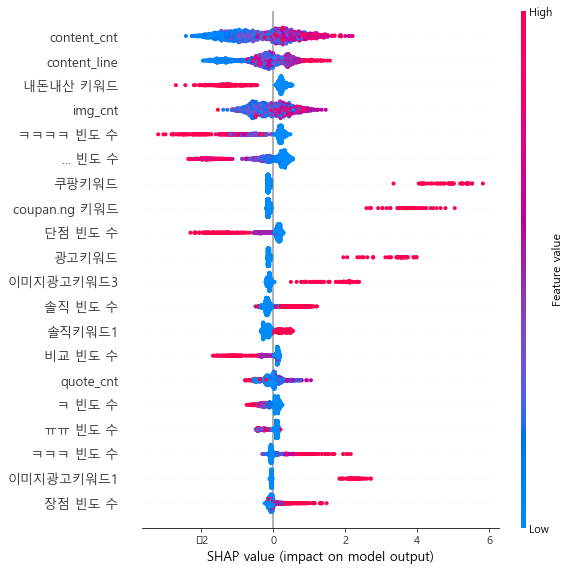

In [133]:
shap.summary_plot(shap_values,x_train.values,feature_names=columns1)

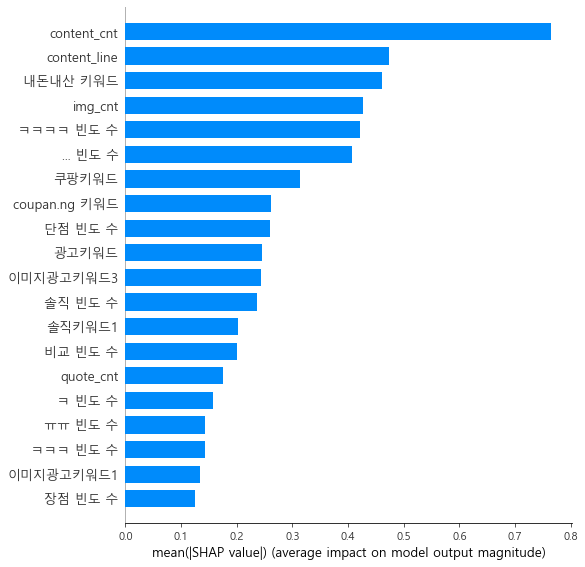

In [134]:
shap.summary_plot(shap_values, x_train, plot_type='bar', feature_names=columns1)

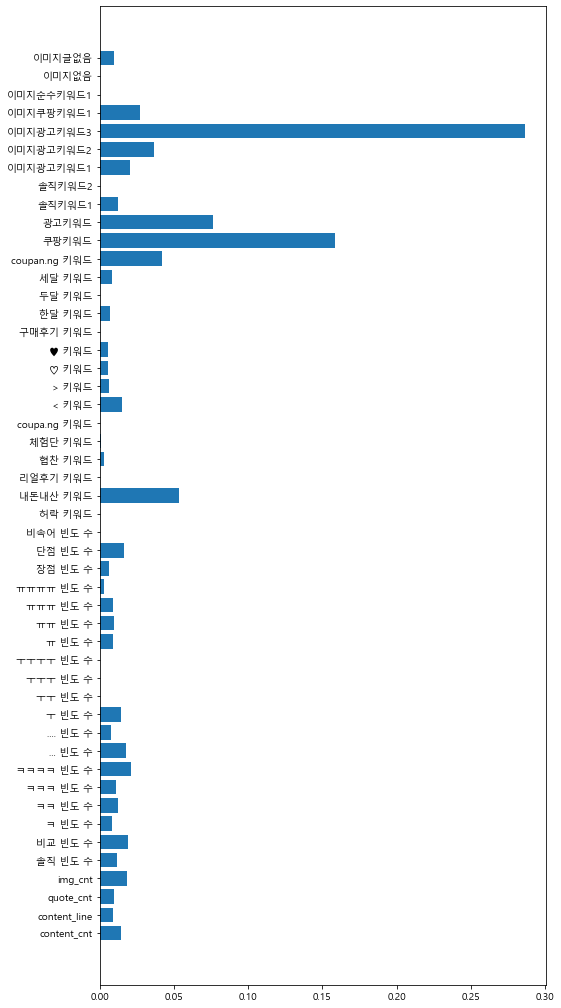

In [138]:
plt.figure(figsize=(8,18))
plt.barh(y=list(x_train), width=xgb_model.feature_importances_.reshape(-1))
plt.show()

## 모델 저장 및 모델 로드

In [140]:
import joblib
joblib.dump(xgb_model, './model/xgb_model_v1.pkl')

['./model/xgb_model_v1.pkl']

In [144]:
loaded_model = joblib.load('./model/xgb_model_v1.pkl')
y_pred = loaded_model.predict(X_test.values)

In [145]:
accuracy_score(y_test,y_pred)

0.8906882591093117